
    
## by<span style="color:cornflowerblue"> MNIST vs My Digit Images using Machine Learning (By Askari Raza)</a>

## Part A Section 1

In [2]:
#1 import required modules
import time
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff

from sklearn.datasets import get_data_home
from joblib import Memory
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from urllib.request import urlopen

##  Part A, Section 2

#### Reading the Dataset

### Training the Model with MNIST Dataset

In [3]:
#2.  read the NMIST dataset
memory = Memory(get_data_home())
@memory.cache()
def fetch_mnist():
    content = urlopen(
        'https://www.openml.org/data/download/52667/mnist_784.arff').read()
    data, meta = loadarff(io.StringIO(content.decode('utf8')))
    data = data.view([('pixels', '<f8', 784), ('class', '|S1')])
    return data['pixels'], data['class']
X, y = fetch_mnist()


________________________________________________________________________________
[Memory] Calling __main__--content-<ipython-input-a08b083f14d8>.fetch_mnist...
fetch_mnist()
_____________________________________________________fetch_mnist - 43.1s, 0.7min


In [3]:
X.shape

(70000, 784)

In [4]:
# rescale the data, use the traditional train/test split

X = X / 255.

###### NEW  Refromat the the labels to be string rather than byte arrays
y_trans = []
for i in range(len(y)):
    y_trans.append(y[i].decode("utf-8"))
y = np.asarray(y_trans)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

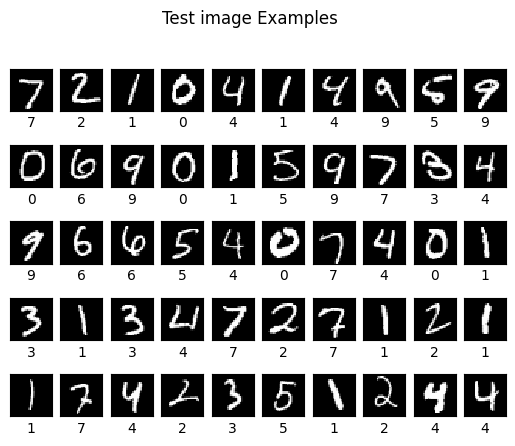

In [5]:
### Bounus 1: show the first ten images
### ALways a good idea to validate that the data appears as you expect
###
### for sci-kit learn the images are represented as vectors of 784 elements
### currently scaled from 0 to 1

for i in range(50):
    l1_plot = plt.subplot(5, 10, i + 1)
    l1_plot.imshow(255 * X_test[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.gray)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    #l1_plot.set_xlabel('Class %s' % y_test[i].decode())
    l1_plot.set_xlabel('%i' % int(y_test[i]))
plt.suptitle('Test image Examples')
plt.show()

In [6]:
## for this demonstration each pixel scale is normalized
## by the mean and standared deviation of the training set
## note the mean and stadard deviation are set by the
## taining set only.
## why is this done?
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
y_train.shape

(60000,)

## Part B, Section 3

In [7]:
#Importing required libraries


import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import confusion_matrix


### Dataset loading and preprocessing:

### 3.1 K-NN model

<span style="color:cornflowerblue"> You can visit this link for more information about K-NN classifier by sk.learn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  </a>

<span style="color:cornflowerblue">
    The function below allows you to conveniently train and test a KNN classifier with a
    single command.
</span>

In [24]:
# KNN Example KNN evelauation fucntion: Trains, Tests and prints results.
#Use a similar function when you need to explore different hyperparameter settings

def KNN(train_features, train_labels, test_features, test_labels, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    start_time = time.time()
    knn.fit(train_features,train_labels)
    train_time = time.time() - start_time

    start_time = time.time()
    print('value of k' , k)
    print('training time' , train_time)
    score_test = knn.score(test_features,test_labels)
    score_training =knn.score(train_features,train_labels)
    test_pred = knn.predict(test_features)

    test_time = time.time() - start_time

    print('Score test' , score_test)
    print('train_score' , score_training)

    print('test time' ,test_time)
    cfm = confusion_matrix(test_labels, test_pred)
    print (cfm)



In [25]:
print('KNN with full data for k = 1')
KNN(X_train , y_train , X_test , y_test , 1)

print('KNN with full data for k = 3')
KNN(X_train , y_train , X_test , y_test , 3)

print('KNN with full data for k = 5')
KNN(X_train , y_train , X_test , y_test , 5)

KNN with full data for k = 1
value of k 1
training time 0.05213522911071777
Score test 0.9434
train_score 1.0
test time 297.67092394828796
[[ 965    1    0    3    1    4    5    0    1    0]
 [   0 1127    3    1    1    0    3    0    0    0]
 [  10    7  966   19    4    0    3   10    9    4]
 [   0    2    3  949    2   19    1   11   16    7]
 [   1    9    5    1  920    2    5    6    3   30]
 [   5    0    1   30    4  813   12    1   18    8]
 [  13    4    1    2    4    5  929    0    0    0]
 [   0   14   11    4    6    1    0  959    1   32]
 [  14    2    7   20    8   30    3    8  875    7]
 [   4    4    6    9   15    6    0   30    4  931]]
KNN with full data for k = 3
value of k 3
training time 0.054379940032958984
Score test 0.9452
train_score 0.9727666666666667
test time 289.16002202033997
[[ 967    0    1    3    0    4    5    0    0    0]
 [   0 1127    3    0    1    0    3    0    1    0]
 [  12    9  967   15    2    0    5   11    9    2]
 [   0    4    5

In [26]:
print('KNN with partial data for k = 1')
KNN(X_train1 , y_train1 , X_test1 , y_test1 , 1)

print('KNN with partial data for k = 3')
KNN(X_train1 , y_train1 , X_test1 , y_test1 , 3)

print('KNN with partial data for k = 5')
KNN(X_train1 , y_train1 , X_test1 , y_test1 , 5)

KNN with partial data for k = 1
value of k 1
training time 0.12392163276672363
Score test 0.95696
train_score 1.0
test time 168.86676335334778
[[4845    5   11    4    2    6   21    4    7    4]
 [   1 5551   16   11    2    3    3    5    2    2]
 [  51   34 4798   27    9    8   19   93   18    4]
 [   6   11   34 4810    2  100    3   27   49   23]
 [   5   37    1    1 4620    1   16   20    3  175]
 [  18   11    2   93   11 4278   60    8   28   29]
 [  33   10    2    2    8   25 4820    0    4    1]
 [   3   71   21    2   20    1    0 4998    1   83]
 [  23   46   21  109   19  130   30   25 4436   64]
 [  14   15    7   25   79   13    1   83   15 4692]]
KNN with partial data for k = 3
value of k 3
training time 0.016594409942626953
Score test 0.95742
train_score 0.98065
test time 155.55546307563782
[[4869    5    6    2    0    4   17    2    3    1]
 [   1 5560   10    8    1    1    4    8    1    2]
 [  61   54 4770   25    6    3   17  106   15    4]
 [  10   17   38 48

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
start_time = time.time()
knn.fit(X_train,y_train)
train_time = time.time() - start_time

start_time = time.time()

score_test = knn.score(X_test,y_test)
score_train =knn.score(X_train,y_train)
test_time = time.time() - start_time

print(score_test)
print(score_train)
print(train_time)
print(test_time)




0.9434
1.0
0.08320116996765137
174.97608256340027


In [9]:
print(score_test)
print(score_train)
print(train_time)
print(test_time)

0.9443
0.96425
0.0641486644744873
214.08510851860046


In [18]:
#with smaller training data
X_train1, X_test1 = X[:20000], X[20000:]
y_train1, y_test1 = y[:20000], y[20000:]

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
knn.fit(X_train1,y_train1)
train_time = time.time() - start_time

start_time = time.time()

score_test = knn.score(X_test1,y_test1)
score_train =knn.score(X_train1,y_train1)
test_time = time.time() - start_time

print(score_test)
print(score_train)
print(train_time)
print(test_time)


0.95652
0.9738
0.04366898536682129
57.541537046432495


In [15]:
###Apply PCA after data splitting and standardization.
#Wisely choose the number of components (n_components) or the amount of variance retained.
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
knn.fit(X_train_pca,y_train)
train_time = time.time() - start_time

start_time = time.time()

score_test = knn.score(X_test_pca,y_test)
score_train =knn.score(X_train_pca,y_train)
test_time = time.time() - start_time

print(score_test)
print(score_train)
print(train_time)
print(test_time)

0.946
0.9665666666666667
0.08843016624450684
25.31709933280945


In [28]:
def KNN_PCA(train_features, train_labels, test_features, test_labels, k, n_comp):

    pca = PCA(n_components=n_comp)
    pca.fit(X_train)
    train_features_pca = pca.transform(train_features)
    test_features_pca = pca.transform(test_features)


    knn = KNeighborsClassifier(n_neighbors=k)
    start_time = time.time()
    knn.fit(train_features_pca,train_labels)
    train_time = time.time() - start_time

    start_time = time.time()
    print(k)
    print(train_time)
    score_test = knn.score(test_features_pca,test_labels)
    score_train =knn.score(train_features_pca,train_labels)
    test_pred = knn.predict(test_features_pca)

    test_time = time.time() - start_time

    print(score_test)
    print(score_train)

    print(test_time)
    cfm = confusion_matrix(test_labels, test_pred)
    print (cfm)

In [30]:
print('KNN_PCA with partial data for k = 1')
KNN_PCA(X_train1 , y_train1 , X_test1 , y_test1 , 1 , 20)

print('KNN_PCA with partial data for k = 3')
KNN_PCA(X_train1 , y_train1 , X_test1 , y_test1 , 3 , 20)

print('KNN_PCA with partial data for k = 5')
KNN_PCA(X_train1 , y_train1 , X_test1 , y_test1 , 5 , 20)

KNN_PCA with partial data for k = 1
1
0.0074176788330078125
0.93912
1.0
19.064401626586914
[[4809    4   17    6    0   16   36    2   14    5]
 [   0 5523   26   12    2    3    4    7   15    4]
 [  35   11 4825   46   11    4   18   55   47    9]
 [   3   14   56 4592    7   97    3   38  216   39]
 [   5   11   14    2 4484    8   32   15   14  294]
 [  22    7    9   98    8 4195   70    5   83   41]
 [  26    7    4    2   12   44 4791    0   17    2]
 [   2   42   41   21   26    4    0 4849   12  203]
 [  20   28   37  138   16  102   31   16 4430   85]
 [  13   20   11   42  203   27    1  124   45 4458]]
KNN_PCA with partial data for k = 3
3
0.0069234371185302734
0.94574
0.9761
19.732738733291626
[[4831    3   13    4    4   12   26    1   14    1]
 [   1 5535   25   11    4    1    4    4    7    4]
 [  39    8 4857   29    9    4   17   43   52    3]
 [   9   25   49 4612    4   90    2   35  206   33]
 [  11   18   14    1 4519    7   33    9    4  263]
 [  36   11    7   

In [ ]:
#MLP

In [31]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,


def MLP_singlelayer(train_features, train_labels, test_features, test_labels, hid_layer_size):

    mlp = MLPClassifier(hidden_layer_sizes=(hid_layer_size,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10,
                    learning_rate_init=.1)

    start_time = time.time()
    mlp.fit(train_features,train_labels)
    train_time = time.time() - start_time

    start_time = time.time()
    #print(k)
    print('Train time: ' ,train_time)
    score_test = mlp.score(test_features,test_labels)
    score_train = mlp.score(train_features,train_labels)
    test_pred = mlp.predict(test_features)

    test_time = time.time() - start_time

    print('Test Score' , score_test)
    print('training score ' ,score_train)

    print('test time' , test_time)
    cfm = confusion_matrix(test_labels, test_pred)
    print (cfm)

In [32]:
print('MLP with one hidden layer on full training data')
MLP_singlelayer(X_train, y_train, X_test, y_test, 50)
print('MLP with one hidden layer on full training data')
MLP_singlelayer(X_train1, y_train1, X_test1, y_test1, 50)

MLP with one hidden layer on full training data
Iteration 1, loss = 0.30553592
Iteration 2, loss = 0.22167471
Iteration 3, loss = 0.23627193
Iteration 4, loss = 0.22569824
Iteration 5, loss = 0.22035187
Iteration 6, loss = 0.24412051
Iteration 7, loss = 0.27025535
Iteration 8, loss = 0.22221857
Iteration 9, loss = 0.17465046
Iteration 10, loss = 0.15080517
Iteration 11, loss = 0.15665666
Iteration 12, loss = 0.15921464
Iteration 13, loss = 0.19102081
Iteration 14, loss = 0.21841866
Iteration 15, loss = 0.24435051
Iteration 16, loss = 0.22630026
Iteration 17, loss = 0.21444883
Iteration 18, loss = 0.21882541
Iteration 19, loss = 0.21312148
Iteration 20, loss = 0.20285563
Train time:  25.078760623931885


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Score 0.9611
training score  0.9820333333333333
test time 0.5000851154327393
[[ 966    0    2    1    1    3    3    1    3    0]
 [   0 1117    5    0    8    2    0    2    1    0]
 [   4    0  998    6    2    1    6    8    7    0]
 [   0    0    7  972    0   19    0    5    4    3]
 [   4    0    9    2  938    0    4    5    4   16]
 [   2    2    2    7    1  860    3    3    6    6]
 [   7    5    4    1    6   10  922    0    3    0]
 [   1    3   15    5   14    0    0  974    1   15]
 [   1    2    6    9    7   29    3    9  906    2]
 [   4    2    0   13   17    2    1    9    3  958]]
MLP with one hidden layer on full training data
Iteration 1, loss = 0.52940580
Iteration 2, loss = 0.25197918
Iteration 3, loss = 0.18653593
Iteration 4, loss = 0.14637298
Iteration 5, loss = 0.11810865
Iteration 6, loss = 0.10124688
Iteration 7, loss = 0.08527019
Iteration 8, loss = 0.07235402
Iteration 9, loss = 0.06009725
Iteration 10, loss = 0.05413540
Iteration 11, loss = 0.04660

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Score 0.95872
training score  0.99865
test time 0.7593691349029541
[[4791    1   17   11    3   17   35    5   18   11]
 [   1 5520   17   20    3    2    5    9   14    5]
 [  28   18 4837   66   18    2   21   37   22   12]
 [   8   12   40 4868    1   42    2   24   48   20]
 [  10   10   13    4 4619    5   41   14   18  145]
 [  23   10   13  102   10 4252   45   20   39   24]
 [  16   12   14    2   24   25 4795    4   13    0]
 [  12   29   55   57   17    5    1 4959    8   57]
 [  23   34   31   77    9   55   27   11 4602   34]
 [  24   10    4   63   47   22    0   56   25 4693]]


In [33]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,


def MLP_twolayer(train_features, train_labels, test_features, test_labels, hid_layer_size):

    mlp = MLPClassifier(hidden_layer_sizes=(hid_layer_size,hid_layer_size), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10,
                    learning_rate_init=.1)

    start_time = time.time()
    mlp.fit(train_features,train_labels)
    train_time = time.time() - start_time

    start_time = time.time()
    #print(k)
    print('training time ',train_time)
    score_test = mlp.score(test_features,test_labels)
    score_train = mlp.score(train_features,train_labels)
    test_pred = mlp.predict(test_features)

    test_time = time.time() - start_time

    print('test score ',score_test)
    print('training score ',score_train)

    print('test time',test_time)
    cfm = confusion_matrix(test_labels, test_pred)
    print (cfm)

In [34]:
print('MLP with two hidden layer on full training data')
MLP_twolayer(X_train, y_train, X_test, y_test, 50)
print('MLP with tw0 hidden layer on full training data')
MLP_twolayer(X_train1, y_train1, X_test1, y_test1, 50)

MLP with two hidden layer on full training data
Iteration 1, loss = 0.28973797
Iteration 2, loss = 0.17041593
Iteration 3, loss = 0.17260302
Iteration 4, loss = 0.13740505
Iteration 5, loss = 0.12465157
Iteration 6, loss = 0.11393621
Iteration 7, loss = 0.09133003
Iteration 8, loss = 0.08382770
Iteration 9, loss = 0.07679033
Iteration 10, loss = 0.07083727
Iteration 11, loss = 0.07265758
Iteration 12, loss = 0.07694570
Iteration 13, loss = 0.09744754
Iteration 14, loss = 0.08510849
Iteration 15, loss = 0.08681993
Iteration 16, loss = 0.07734623
Iteration 17, loss = 0.07140290
Iteration 18, loss = 0.07368897
Iteration 19, loss = 0.06420060
Iteration 20, loss = 0.05504982
training time  27.855942010879517


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


test score  0.962
training score  0.9844333333333334
test time 0.5635740756988525
[[ 963    0    2    5    0    1    6    1    2    0]
 [   0 1126    2    1    0    1    3    1    1    0]
 [   4    2  992   15    2    0    6    6    4    1]
 [   0    0    7  976    0   13    0    4    4    6]
 [   0    0    4    7  934    0    6    2    1   28]
 [   3    1    0   18    1  841   12    2    7    7]
 [   4    3    2    4    3    3  936    2    1    0]
 [   0    4   11    9    1    1    1  995    1    5]
 [   1    0    6   34    5    8    3    5  910    2]
 [   4    2    0   18    9    4    1   17    7  947]]
MLP with tw0 hidden layer on full training data
Iteration 1, loss = 0.55867242
Iteration 2, loss = 0.19123152
Iteration 3, loss = 0.13695456
Iteration 4, loss = 0.10632690
Iteration 5, loss = 0.08857691
Iteration 6, loss = 0.07002306
Iteration 7, loss = 0.05770997
Iteration 8, loss = 0.04622428
Iteration 9, loss = 0.03778265
Iteration 10, loss = 0.03130629
Iteration 11, loss = 0.03028

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


test score  0.95822
training score  0.9975
test time 0.8006103038787842
[[4791    4   24   11   15   11   23    3   18    9]
 [   1 5518   28   11   11    1    5    7    9    5]
 [  27   16 4877   44   28    6   15   20   20    8]
 [  12    9   49 4858   10   40    3   11   39   34]
 [   7    8   13    4 4747    0   11    5    4   80]
 [  19   14   11  115   19 4188   54   13   57   48]
 [  23   10   20    7   67   20 4733    0   25    0]
 [  16   36   68   45   37    2    0 4898   11   87]
 [  22   46   30   86   31   35   18    5 4572   58]
 [  11    9    1   37  103   10    0   30   14 4729]]


In [41]:
#SVM AND RBF

# KNN Example KNN evelauation fucntion: Trains, Tests and prints results.
#Use a similar function when you need to explore different hyperparameter settings

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
clf = SVC(kernel = 'rbf', C = 1, gamma = 0.5)

start_time = time.time()

clf.fit(X_train1, y_train1)
train_time = time.time() - start_time

start_time = time.time()

print("Training set score: %f" % clf.score(X_train1, y_train1))
print("Test set score: %f" % clf.score(X_test1, y_test1))

test_time = time.time() - start_time

print(train_time)
print(test_time)


Training set score: 1.000000
Test set score: 0.238900
269.29035353660583
1162.7739658355713


In [15]:
def SVM(train_features, train_labels, test_features, test_labels, type_):

    if type_ == 'linear':
        clf = SVC(kernel = 'linear', C = 1)
    elif type_ == 'rbf':
        clf = SVC(kernel = 'rbf', C = 1, gamma = 0.5)

    start_time = time.time()
    clf.fit(train_features,train_labels)
    train_time = time.time() - start_time

    start_time = time.time()
    #print(k)
    print(train_time)
    score_test = clf.score(test_features,test_labels)
    score_train = clf.score(train_features,train_labels)
    test_pred = clf.predict(test_features)

    test_time = time.time() - start_time

    print(score_test)
    print(score_train)

    print(test_time)
    cfm = confusion_matrix(test_labels, test_pred)
    print (cfm)

In [16]:
SVM(X_train, y_train, X_test, y_test, 'linear')

518.8517742156982
0.9293
0.9821
514.6786148548126
[[ 951    0    5    2    2    8    8    2    1    1]
 [   0 1119    6    2    0    1    2    1    4    0]
 [  10   13  956   11    7    4    5    6   18    2]
 [   7    1   15  941    0   16    1    6   19    4]
 [   3    2   18    1  929    0    3    5    4   17]
 [   7    6    7   41    6  789   12    2   19    3]
 [  12    3   13    1    8   17  902    0    2    0]
 [   2    8   23   13   10    1    0  945    5   21]
 [  12    6   11   28    8   24    9    6  858   12]
 [   6    7    6   10   36    4    1   23   13  903]]


In [19]:
SVM(X_train1, y_train1, X_test1, y_test1, 'rbf')

518.858763217926
0.2389
1.0
2297.3449470996857
[[   1    0    0 4908    0    0    0    0    0    0]
 [   0 4324    0 1268    0    0    0    4    0    0]
 [   0    0    0 5061    0    0    0    0    0    0]
 [   0    0    0 5065    0    0    0    0    0    0]
 [   0    0    0 4877    2    0    0    0    0    0]
 [   0    0    0 4538    0    0    0    0    0    0]
 [   0    0    0 4888    0    0   17    0    0    0]
 [   0    0    0 2755    0    0    0 2445    0    0]
 [   0    0    0 4903    0    0    0    0    0    0]
 [   0    0    0 4836    0    0    0   17    0   91]]


<span style="color:cornflowerblue"> You can visit this link for more information about PCA by sk.learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html </a>

In [ ]:
#PCA


**Discussion**

<span style="color:cornflowerblue"> Discuss the performance and compare the test and training time of EVERY applied model. Modify the table below with your results. The first row is an example of how you should fill the table. Replace with you own result. Also, you can add new rows and columns as needed. </a>


| Data| K | Training Time | Training Score | Test Time | Test Score |
| --- | --- | --- | --- | --- | --- |
| Full | 1 | 15.01 | ?? | 1033.4 | 96.91 |
| Partly | - | - | - | - | - |
| -  | - | - | - | - | - |
| -  | - | - | - | - | - |
| -  | - | - | - | - | - |
| -  | - | - | - | - | - |




### 3.2 Multi Layer Perceptron

<span style="color:cornflowerblue">  Define a function for conducting training and testing similar to the example provided for the K-NN classifier.  </a>

<span style="color:cornflowerblue"> You can visit this link for more information about MLP by sk.learn: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html </a>

In [ ]:
#MLP model


**Discussion**

<span style="color:cornflowerblue"> Create a table of your results and discuss as for KNN.   </a>



### 3.3 Support Vector Classifier

<span style="color:cornflowerblue"> Define a function for conducting training and testing similar to the example provided for the K-NN classifier.  </a>


<span style="color:cornflowerblue"> You can visit this link for more information about SVC by sk.learn:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html </span>

In [ ]:
#SVC model

**Discussion**

<span style="color:cornflowerblue"> Create a table of your results and discuss as for KNN.   </span>



### 3.4 Summary

<span style="color:cornflowerblue"> Create a table with the main results from the different models you have explored. Discuss/compare the relative performance of the different models.   </span>